In [50]:
import pandas as pd
import numpy as np

# Cargar el conjunto de datos
df = pd.read_csv('heart_cleveland.csv')

# Mostrar las primeras filas del conjunto de datos
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [51]:
# Información general del conjunto de datos
df.info()

# Estadísticas descriptivas
df.describe()

# Verificar valores faltantes
df.isnull().sum()

# Verificar valores únicos por columna
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

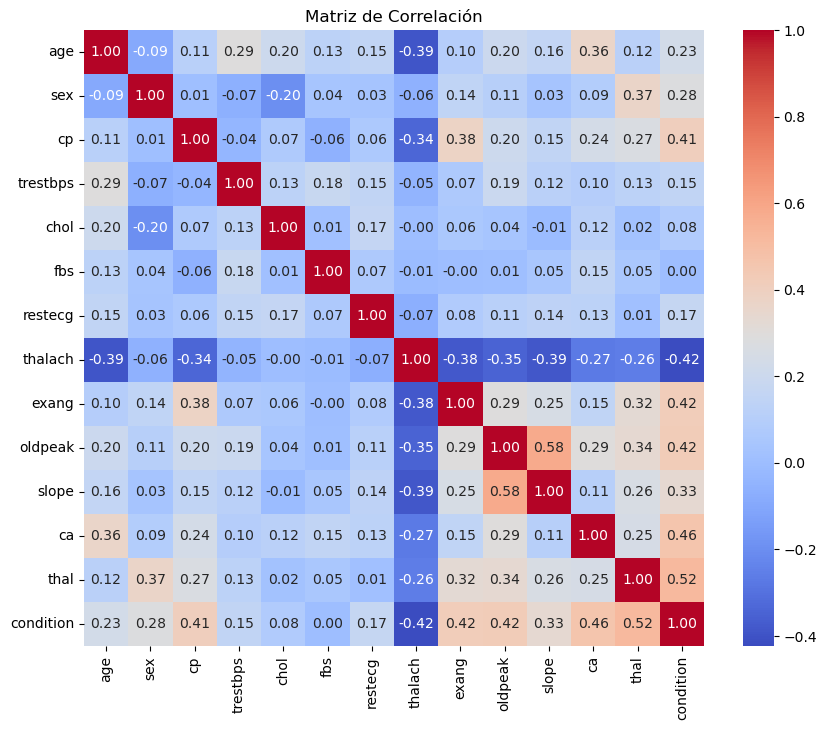

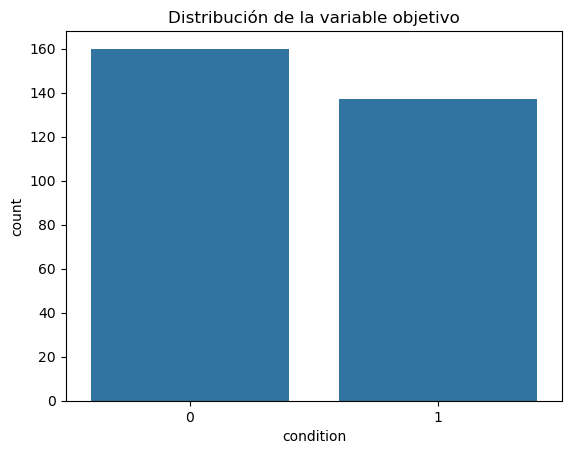

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Distribución de la variable objetivo
sns.countplot(x='condition', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()

In [53]:
# Seleccionar características con alta correlación con la variable objetivo
target_corr = corr_matrix['condition'].sort_values(ascending=False)
print(target_corr)

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
thalach     -0.423817
Name: condition, dtype: float64


In [54]:
from sklearn.model_selection import train_test_split

# Definir variables independientes y dependientes
X = df.drop(columns=['condition'])
y = df['condition']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.metrics import classification_report, accuracy_score

# Predicciones
y_pred_logreg = logreg.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Evaluación de Regresión Logística
print("Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))

Regresión Logística:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



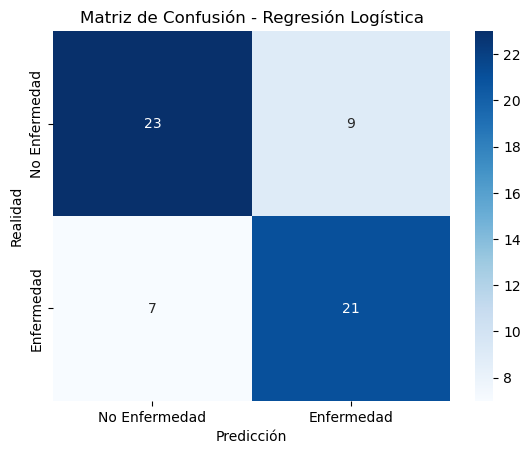

In [56]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión para Regresión Logística
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()